In [1]:
!ls

 Assignment.ipynb	   samsung_train_labels.txt
 samsung_test_labels.txt   samsung_train.txt
 samsung_test.txt	  'Unsupervised Learning - PCA and Clustering.ipynb'


In [17]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt


In [3]:
X_train = np.loadtxt("samsung_train.txt")
y_train = np.loadtxt("samsung_train_labels.txt")

X_test = np.loadtxt("samsung_test.txt")
y_test = np.loadtxt("samsung_test_labels.txt")

For clustering we don't need a target vector, so we will be working with the combination of training and test samples.

In [5]:
# Merging the data
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

In [6]:
np.unique(5)

array([5])

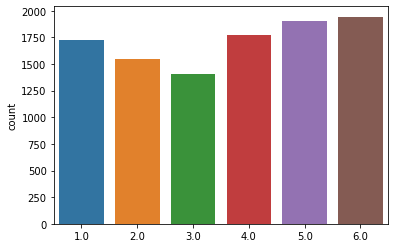

In [7]:
sns.countplot(y)

1 - walking

2 - going up the stairs

3 - going down the stairs

4 - sitting

5 - standing

6 - lying down

In [25]:
#Scaling the dataset using StandardScalar

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
X_scaled.shape

(10299, 561)

In [27]:
pca = PCA(n_components=0.9, random_state=42).fit(X_scaled)
X_pca = pca.transform(X_scaled)

In [28]:
X_pca.shape

(10299, 65)

In [29]:
pca.explained_variance_ratio_[0]*100

50.73822103501337

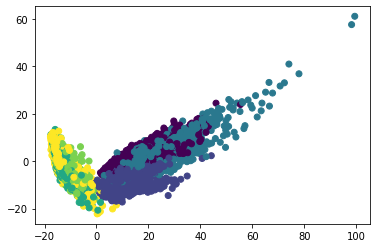

In [30]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)

In [31]:
n_classes = np.unique(y).size

In [32]:
n_classes

6

Just run the KMeans mehtod on PCA data while giving 6 clusters.

In [33]:
kmean = KMeans(n_clusters=n_classes, n_init=100, 
              random_state=42, n_jobs=1)
kmean.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=100, n_jobs=1, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [34]:
cluster_labels = kmean.labels_

In [35]:
cluster_labels

array([3, 3, 3, ..., 2, 2, 2], dtype=int32)

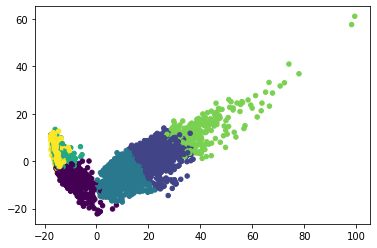

In [36]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20, cmap='viridis')

In [37]:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs',
            'going down the stairs', 'sitting', 'standing', 'lying', 'all']

tab.columns = ['cluster' + str(i+1) for i in range(6)] + ['all']
tab

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,all
walking,0,741,903,0,78,0,1722
going up the stairs,2,296,1241,0,5,0,1544
going down the stairs,0,890,320,0,196,0,1406
sitting,450,0,1,1235,0,91,1777
standing,562,0,0,1344,0,0,1906
lying,329,0,5,52,0,1558,1944
all,1343,1927,2470,2631,279,1649,10299


In [38]:
inertia = []
for k in range(1, n_classes+1):
    kmeans = KMeans(n_clusters=k, n_init=100, random_state=42, n_jobs=1).fit(X_pca)
    inertia.append(np.sqrt(kmeans.inertia_))

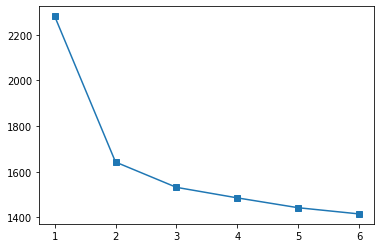

In [39]:
plt.plot(range(1, 7), inertia, marker='s');

In [40]:
ag = AgglomerativeClustering(n_clusters=n_classes, linkage='ward').fit(X_pca)

In [41]:
print('KMeans: ARI =', metrics.adjusted_rand_score(y, cluster_labels))
print('Agglomerative CLustering: ARI =', 
      metrics.adjusted_rand_score(y, ag.labels_))

KMeans: ARI = 0.4198070012602345
Agglomerative CLustering: ARI = 0.49362763373004886


In [42]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [55]:
svc = LinearSVC(random_state=42)

In [57]:
svc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'squared_hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [44]:
svc_params = {'C':[0.001, 0.01, 0.1, 1, 10]}
best_svc = GridSearchCV(svc, svc_params, n_jobs=1, cv=3, verbose=1)

In [45]:
best_svc.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: Convergenc

GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [46]:
best_svc.best_params_, best_svc.best_score_

({'C': 0.1}, 0.9382506099134881)

In [47]:
y_predicted = best_svc.predict(X_test_scaled)

In [48]:
tab = pd.crosstab(y_test, y_predicted, margins=True)
tab.index = ['walking', 'climbing up the stairs',
             'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['walking', 'climbing up the stairs',
             'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab


,walking,climbing up the stairs,going down the stairs,sitting,standing,lying,all
walking,479,11,4,2,0,0,496
climbing up the stairs,4,465,1,1,0,0,471
going down the stairs,1,2,416,1,0,0,420
sitting,0,4,0,433,52,2,491
standing,0,0,0,16,516,0,532
lying,0,0,0,0,6,531,537
all,484,482,421,453,574,533,2947


In [50]:
# Your code here
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.9, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [51]:
svc = LinearSVC(random_state=42)
svc_params = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [52]:
%%time
best_svc_pca = GridSearchCV(svc, svc_params, n_jobs=1, cv=3, verbose=1)
best_svc_pca.fit(X_train_pca, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: Convergenc

CPU times: user 19 s, sys: 2.68 s, total: 21.7 s
Wall time: 16.7 s


/home/gopal/ml_env/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [53]:
best_svc_pca.best_params_, best_svc_pca.best_score_

({'C': 0.1}, 0.8985343758066261)

In [54]:
round(100 * (best_svc_pca.best_score_ - best_svc.best_score_))

-4.0